         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True
Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\jvito\AppData\Local\Temp\ipykernel_20856\804139346.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


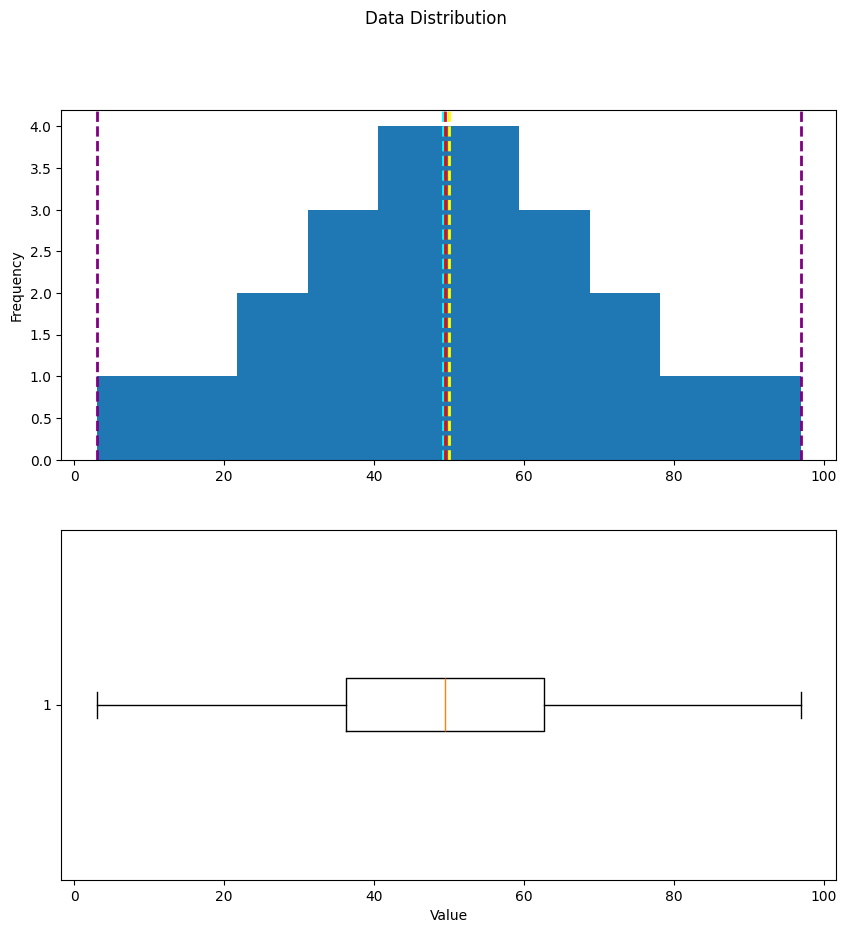

In [60]:
import pandas as pd
from matplotlib import pyplot as plt

# Load data from a text file
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
print(df_students)


# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,10))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'purple', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'purple', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


show_distribution(df_students['Grade'])

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\jvito\AppData\Local\Temp\ipykernel_20856\804139346.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


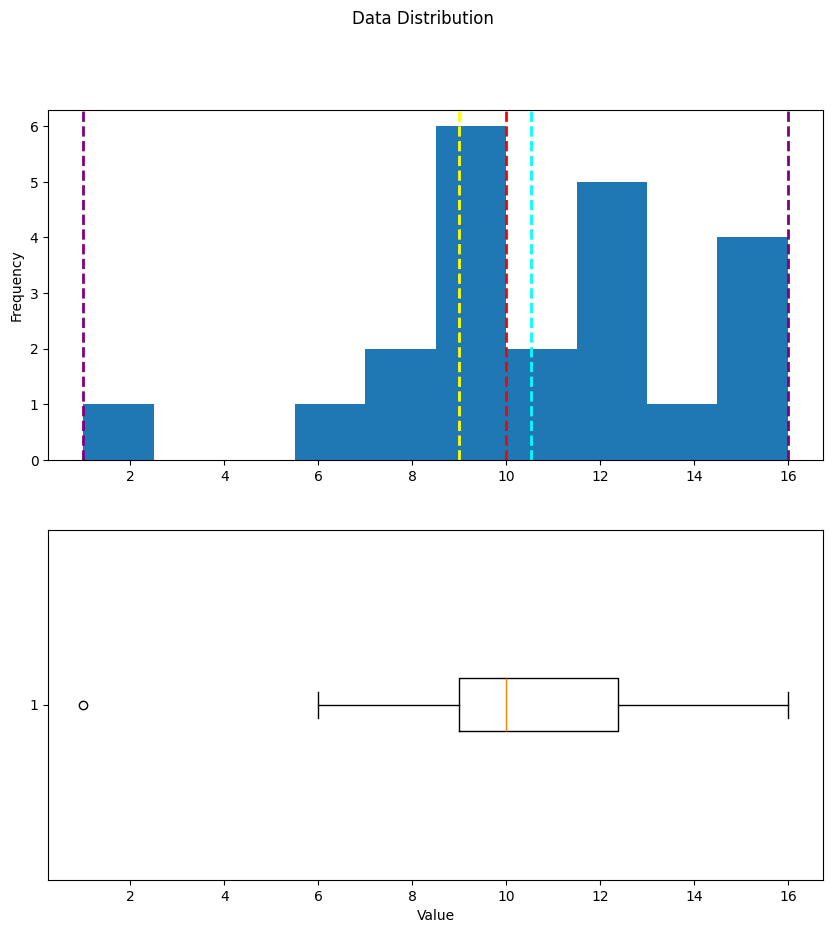

In [61]:
show_distribution(df_students.StudyHours)

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\jvito\AppData\Local\Temp\ipykernel_20856\804139346.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


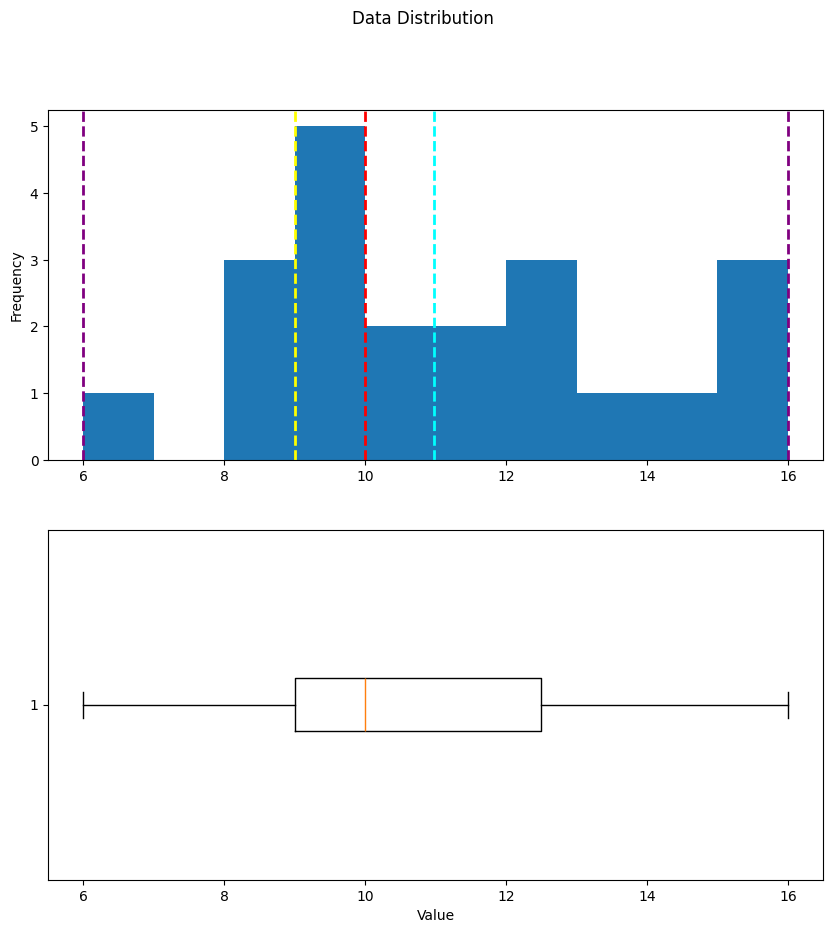

In [62]:
col = df_students[df_students.StudyHours>1]['StudyHours']
show_distribution(col)

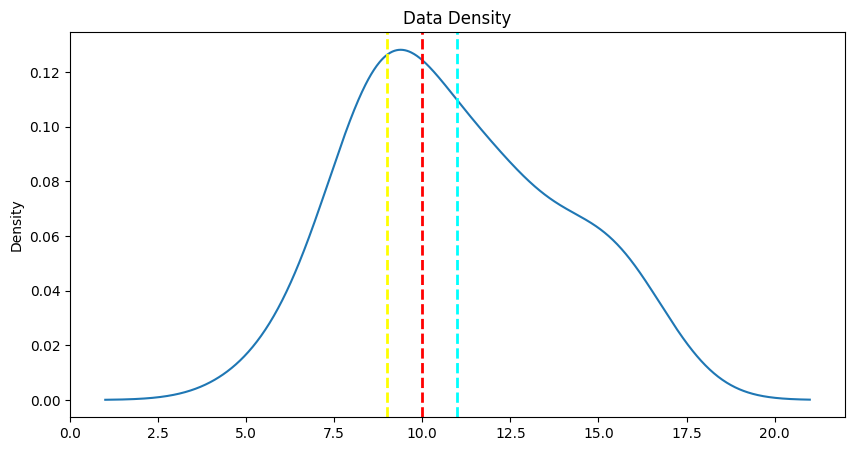

In [63]:
# Gráfico da densidade
def show_density(var_data):
    fig = plt.figure(figsize=(10,5))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(col)

In [47]:
# Desvio padrão e variancia a mão
from math import sqrt

mean = df_students.StudyHours.mean()
variance = 0

for hours in df_students.StudyHours:
    variance = variance + (mean - hours)**2
    
variance = variance/df_students.shape[0]

variance

std = sqrt(variance)

std

3.4069690366260925

In [48]:
# Calcula algumas variações
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


In [49]:
# Mostra o quanto 68% das notas variam
print(f'68% of grades will fall between {df_students.Grade.mean()-df_students.Grade.std()} and {df_students.Grade.mean()+df_students.Grade.std()}')

68% of grades will fall between 27.443906678253803 and 70.91972968538255


In [50]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [97]:
df_sample = df_students[df_students.StudyHours>1]
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

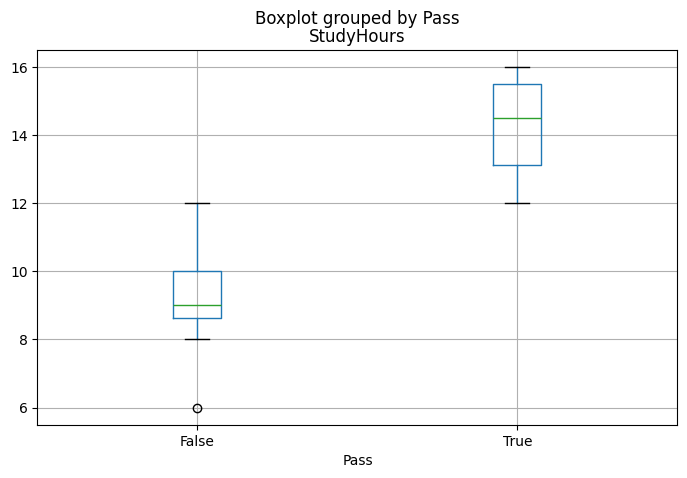

In [98]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

<Axes: xlabel='Name'>

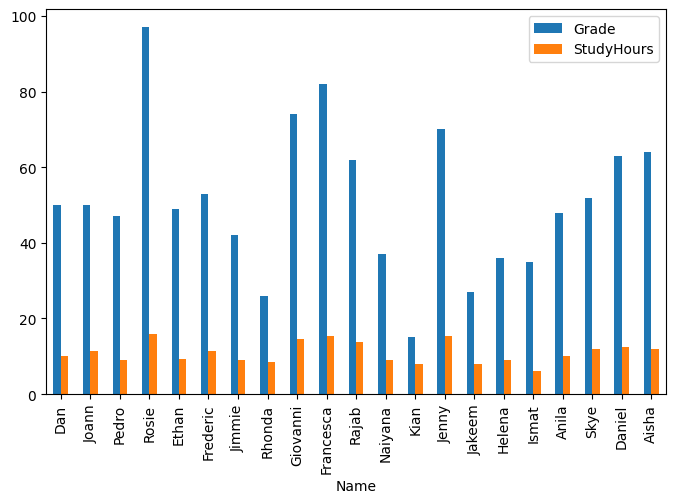

In [99]:
# Gráfico que correlaciona as notas e as horas de estudo
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

<Axes: xlabel='Name'>

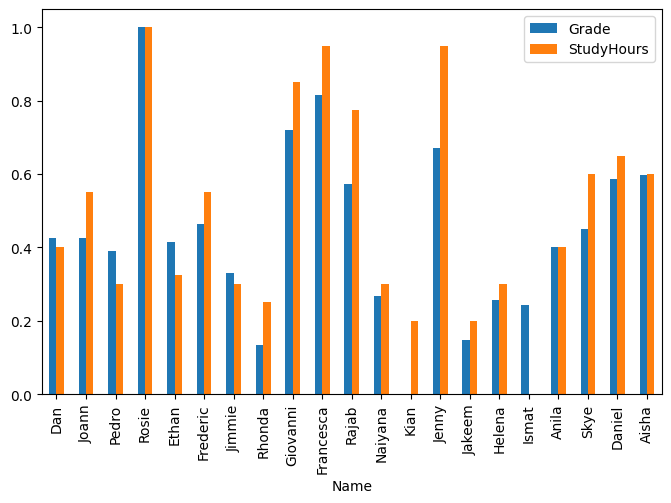

In [100]:
# Ajusta a escala do gráfico
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = df_sample[['Name','Grade','StudyHours']].copy()

df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

In [101]:
# Mostra que os dados estão correlacionados indo de -1 a 1 
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789677

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

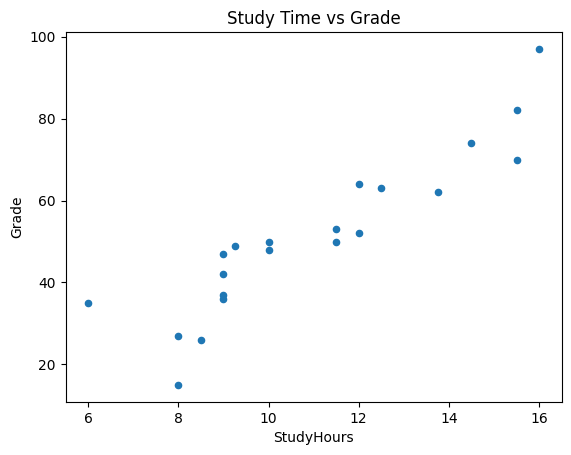

In [102]:
# Gráfico de dispersão
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

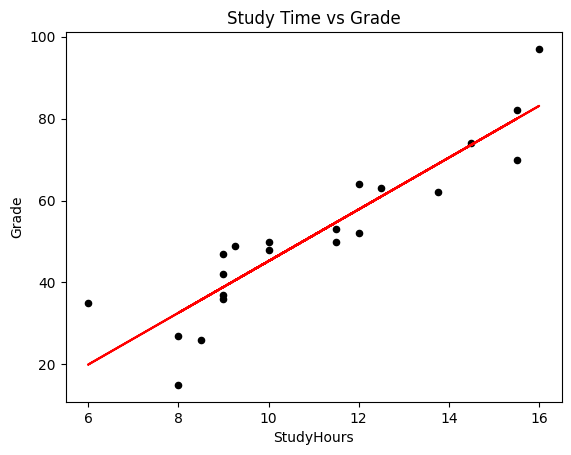

6.31342563379236 -17.91640993281615


In [103]:
# Gráfico de dispersão com linha de tendência 
from scipy import stats

df_regression = df_sample[['Grade','StudyHours']].copy()

m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])

df_regression['fx'] = (m*df_regression['StudyHours']) + b

df_regression['error'] = df_regression['fx'] - df_regression['Grade']

df_regression.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade', color='black')

plt.plot(df_regression['StudyHours'], df_regression['fx'], color='red')

plt.show()

print(m, b)

In [104]:
# Faz uma previsão da sua nota baseado na quantidade de horas que você estudou
def predict(x):
    m = 6.31342563379236
    b = -17.91640993281615
    return m*x+b

prediction = predict(12.4)

if prediction <= 0:
    print(0)
else:
    print(prediction)

60.37006792620912
